# Workshop 9: gradient

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from functions import steepestdescent, conjugate_gradient

## Test didattici per il caso n=2, visualizzando le curve di livello

/var/folders/_7/dz7k1bzj4nb3896c2g7m5kqh0000gn/T/ipykernel_38797/3004916450.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i][j] = f(np.array([[x_coor], [y_coor]]), A, b)


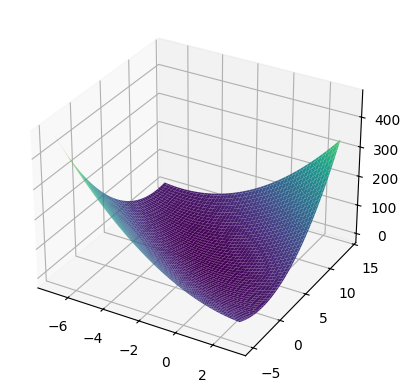

In [70]:
def f(x, A, b):
    Ax = A @ x
    xAx = x.T @ Ax
    bx = b.T @ x
    return 0.5 * xAx - bx


A = np.array([[8, 4], [4, 3]])
b = np.array([[8], [10]])
x = np.linspace(-7, 3, 100)
y = np.linspace(-5, 14, 100)

X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(len(y)):
    for j in range(len(x)):
        x_coor = X[i][j]
        y_coor = Y[i][j]
        Z[i][j] = f(np.array([[x_coor], [y_coor]]), A, b)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plotta la superficie
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)

plt.show()

99
Soluzione sistema  [[-2.]
 [ 6.]]
Numero di iterati  99
cond A 10.246950765959598


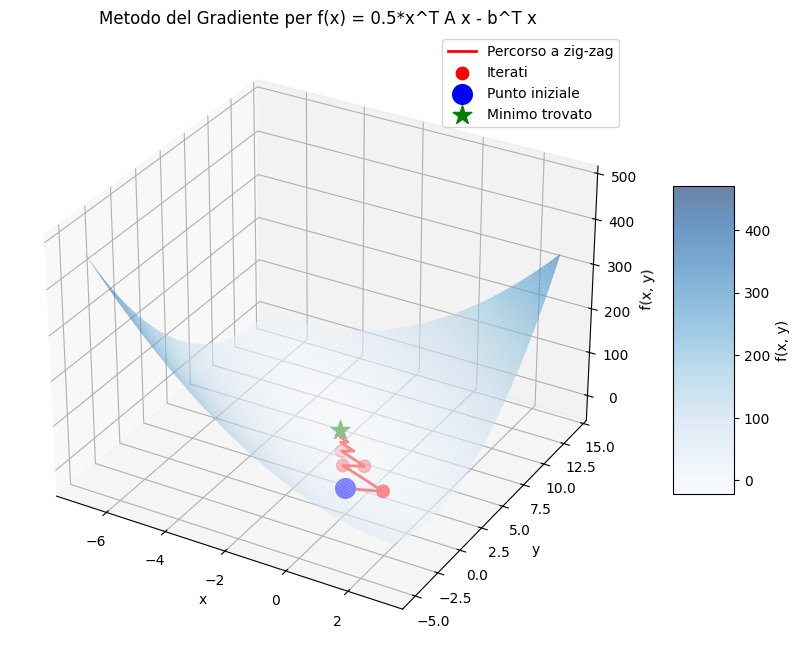

In [71]:
x0 = np.zeros_like(b)
x_G_0, vet_r_G_0, vec_sol_G, itG_0 = steepestdescent(A, b, x0)
print(itG_0)


print("Soluzione sistema ", x_G_0)
print("Numero di iterati ", itG_0)
# Visualizzazione grafica 3D
# Creazione della griglia per la superficie
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot della superficie

surf = ax.plot_surface(
    X, Y, Z, cmap="Blues", alpha=0.6, rstride=1, cstride=1, linewidth=0
)

# Calcolo di z_iterates
z_iterates = np.array(
    [f(vec_sol_G[i, :].reshape(2, 1), A, b) for i in range(vec_sol_G.shape[0])]
)

# Plot del percorso degli iterati
ax.plot(
    vec_sol_G[:, 0],
    vec_sol_G[:, 1],
    z_iterates.flatten(),
    color="red",
    linewidth=2,
    label="Percorso a zig-zag",
)
ax.scatter(
    vec_sol_G[:5, 0],
    vec_sol_G[:5, 1],
    z_iterates[:5].flatten(),
    color="red",
    s=80,
    label="Iterati",
)

# Punto iniziale e minimo
ax.scatter(
    [x0[0, 0]],
    [x0[1, 0]],
    [f(x0, A, b)],
    color="blue",
    s=200,
    marker="o",
    label="Punto iniziale",
)
ax.scatter(
    [x_G_0[0, 0]],
    [x_G_0[1, 0]],
    f(x_G_0, A, b),
    color="green",
    s=200,
    marker="*",
    label="Minimo trovato",
)

# Personalizzazione
ax.set_title(f"Metodo del Gradiente per f(x) = 0.5*x^T A x - b^T x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label="f(x, y)")
print("cond A", np.linalg.norm(A))
plt.show()

1
cond A 10.246950765959598


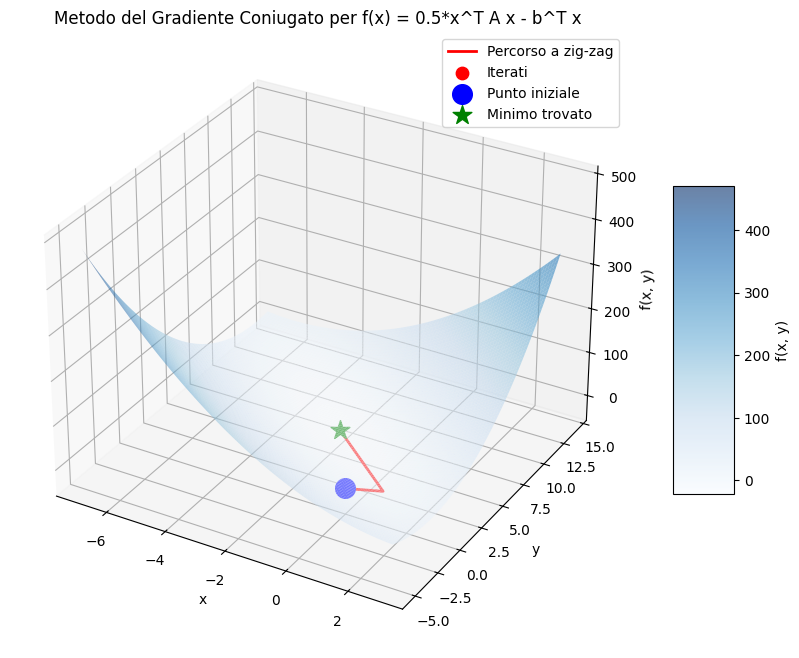

In [72]:
x0 = np.zeros_like(b)
x_cg_0, vet_r_cg_0, vec_sol_cg, itcg_0 = conjugate_gradient(A, b, x0)
print(itcg_0)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot della superficie
surf = ax.plot_surface(
    X, Y, Z, cmap="Blues", alpha=0.6, rstride=1, cstride=1, linewidth=0
)

# Calcolo di z_iterates
z_iterates = np.array(
    [f(vec_sol_cg[i, :].reshape(2, 1), A, b) for i in range(vec_sol_cg.shape[0])]
)

# Plot del percorso degli iterati
ax.plot(
    vec_sol_cg[:, 0],
    vec_sol_cg[:, 1],
    z_iterates.flatten(),
    color="red",
    linewidth=2,
    label="Percorso a zig-zag",
)
ax.scatter(
    vec_sol_G[:1, 0],
    vec_sol_G[:1, 1],
    z_iterates[:1].flatten(),
    color="red",
    s=80,
    label="Iterati",
)

# Punto iniziale e minimo
ax.scatter(
    [x0[0, 0]],
    [x0[1, 0]],
    [f(x0, A, b)],
    color="blue",
    s=200,
    marker="o",
    label="Punto iniziale",
)
ax.scatter(
    [x_cg_0[0, 0]],
    [x_cg_0[1, 0]],
    f(x_cg_0, A, b),
    color="green",
    s=200,
    marker="*",
    label="Minimo trovato",
)

# Personalizzazione
ax.set_title(f"Metodo del Gradiente Coniugato per f(x) = 0.5*x^T A x - b^T x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label="f(x, y)")
print("cond A", np.linalg.norm(A))
plt.show()

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

Condizionameto di A 11.917666569787283
Iterazioni Gradiente  100
Iterazioni Gradiente Coniugato  4
Condizionamento di A 11.917666569787283


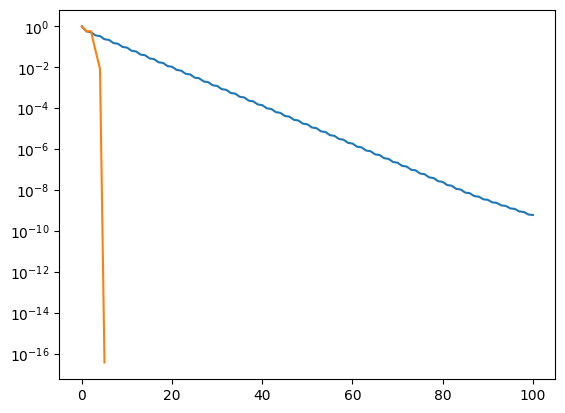

In [73]:
def creaPoisson(n):
    d = np.ones((n)) * 4
    e = -np.ones((n - 1,))
    f = -np.ones((n - 3,))
    A = np.diag(d) + np.diag(e, -1) + np.diag(e, 1) + np.diag(f, -3) + np.diag(f, 3)
    return A


n = 10
A = creaPoisson(n)
print("Condizionameto di A", np.linalg.cond(A))
b = np.sum(A, axis=1).reshape(n, 1)
n = A.shape[0]
x0 = np.zeros_like(b)

x_gr, vet_r_gr, vec_sol_gr, itG = steepestdescent(A, b, x0)
print("Iterazioni Gradiente ", itG)

x_cg, vet_r_cg, vec_sol_cg, itCG = conjugate_gradient(A, b, x0)
print("Iterazioni Gradiente Coniugato ", itCG)

plt.semilogy(np.arange(len(vet_r_gr)), vet_r_gr, label="Gradient")
plt.semilogy(
    np.arange(len(vet_r_cg)), vet_r_cg, label="Conjugate Gradient"
)  # mi da errore
print("Condizionamento di A", np.linalg.cond(A))

## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente e  visualizzare gli errori ad ogni iterazione.

Numero di iterazioni del gradiente   100
Numero di iterazioni del gradiente coniugato  6
Condizionamento di Hilbert  476607.25024265185


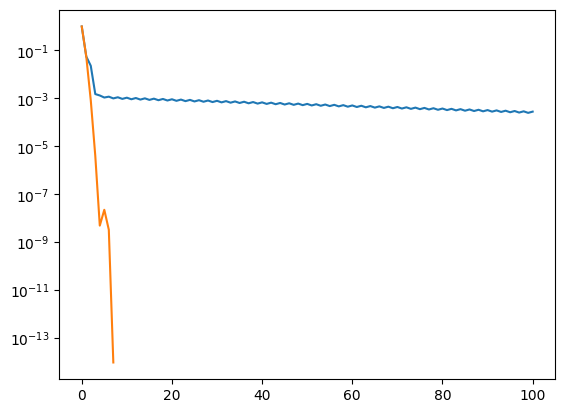

In [74]:
from scipy.linalg import hilbert

n = 5
A2 = hilbert(5)
b2 = np.sum(A2, axis=1).reshape(n, 1)
x2_0 = np.zeros_like(b2)

x_gr_2, vet_r_gr_2, vec_sol_gr2, itG_2 = steepestdescent(A2, b2, x2_0)
print("Numero di iterazioni del gradiente  ", itG_2)

x_CG_2, vet_r_CG_2, vec_sol_CG2, itCG_2 = conjugate_gradient(A2, b2, x2_0)
print("Numero di iterazioni del gradiente coniugato ", itCG_2)

print("Condizionamento di Hilbert ", np.linalg.cond(A2))

plt.semilogy(np.arange(len(vet_r_gr_2)), vet_r_gr_2, label="Gradient")
plt.semilogy(np.arange(len(vet_r_CG_2)), vet_r_CG_2, label="Conjugate Gradient")

plt.show()